<a href="https://colab.research.google.com/github/RehabEmam228/Bertlesmann-challenge/blob/master/MNIST_fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
!wget -c https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py

--2020-01-25 19:08:55--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [0]:
import torch
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms
import helper

In [0]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))
])
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

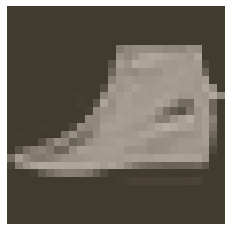

In [40]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

In [0]:
model = nn.Sequential(
    nn.Linear(784, 256),
    nn.ReLU(),
    nn.Linear(256, 10),
    nn.ReLU(),
    nn.LogSoftmax(dim=1)
)
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.005)


In [42]:
epochs = 30
for e in range(epochs):
  running_loss=0
  for images , labels in trainloader:
    # flatten images
    images = images.view(images.shape[0], -1)
    optimizer.zero_grad()
    output = model(images)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  else:
    print(f"Training Loss: {running_loss/len(trainloader)}")

Training Loss: 1.2446719941172772
Training Loss: 0.8916456023576671
Training Loss: 0.8139317884628199
Training Loss: 0.7904278133977959
Training Loss: 0.7797750185992418
Training Loss: 0.7755962079966755
Training Loss: 0.7642700803686561
Training Loss: 0.7557497604061038
Training Loss: 0.7519293493235798
Training Loss: 0.7475523978853023
Training Loss: 0.7423604601291197
Training Loss: 0.7371495558318298
Training Loss: 0.7341838816462803
Training Loss: 0.7301529093083542
Training Loss: 0.724023054117587
Training Loss: 0.7232831199603803
Training Loss: 0.7210191147032577
Training Loss: 0.7165280089004716
Training Loss: 0.7171696023836828
Training Loss: 0.7094567977606869
Training Loss: 0.7102121832782525
Training Loss: 0.7105876444690009
Training Loss: 0.70536682559356
Training Loss: 0.7055658551612134
Training Loss: 0.7054007443537844
Training Loss: 0.7011016144999055
Training Loss: 0.6953750489426574
Training Loss: 0.6966039220979219
Training Loss: 0.6938698147850504
Training Loss: 0.

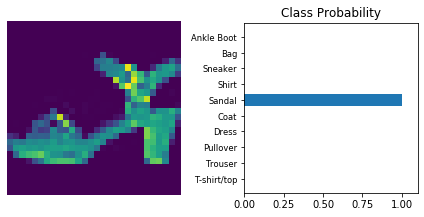

In [58]:
images, labels = next(iter(testloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps, version='Fashion')